# Image segmentation quality measurements
For determining how good a segmentation algorithm is, and to compare different algorithms, we need a metric. A common metric is the [Jaccard Index](https://en.wikipedia.org/wiki/Jaccard_index), which is a measure of overlap between a reference segmentation and the segmentation an algorithm produced for example. If we work with label images, a fair method is to determine the overlap of every annotated object with the most overlapping object in the automatic segmentation. If we average this value over all annotated objects, we receive the [Sparse Jaccard Index as defined in The Segmentation Game](https://github.com/haesleinhuepf/the-segmentation-game#segmentation-algorithm-comparison).

In [1]:
import os
import napari
import napari_segment_blobs_and_things_with_membranes as nsbatwm
from the_segmentation_game import metrics
from skimage.io import imread, imshow
import stackview

To demonstate this, we pick a random example image from the [BBBC007](https://bbbc.broadinstitute.org/BBBC007) dataset (Jones et al., Proc. ICCV Workshop on Computer Vision for Biomedical Image Applications, 2005), available from the Broad Bioimage Benchmark Collection [Ljosa et al., Nature Methods, 2012].

In [2]:
image_folder = "data/BBBC007_batch/images/"
sparse_annotation_folder = "data/BBBC007_batch/annotations/"

test_image_filename = "17P1_POS0013_D_1UL.tif"

StackViewNDArray([[3, 3, 3, ..., 2, 3, 3],
                  [5, 4, 4, ..., 3, 3, 2],
                  [6, 5, 4, ..., 2, 3, 2],
                  ...,
                  [2, 1, 1, ..., 1, 1, 1],
                  [1, 2, 2, ..., 2, 1, 1],
                  [2, 2, 1, ..., 1, 1, 1]], dtype=uint16)
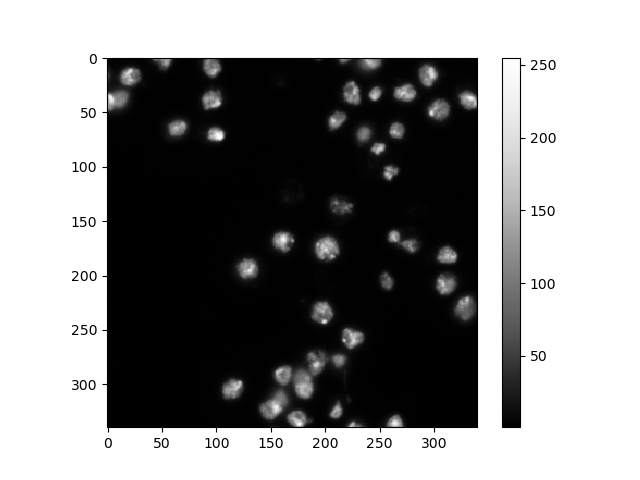
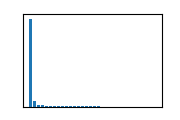

In [3]:
image = imread(image_folder + test_image_filename)

stackview.insight(image)

In a separate folder there are manual annotations of some nuclei stored as label image.

StackViewNDArray([[0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]], dtype=int32)
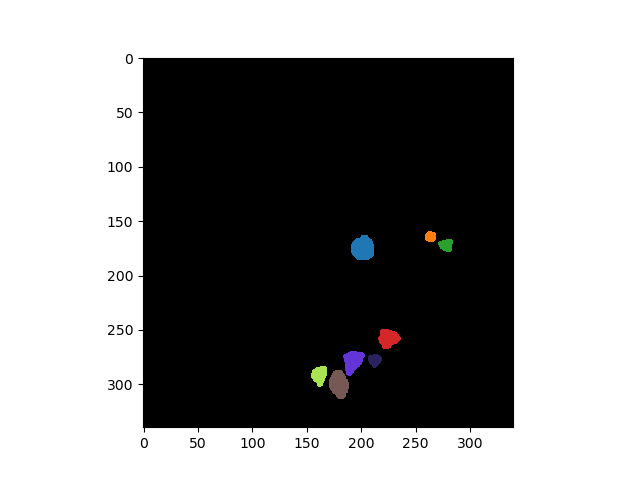

In [4]:
annotation = imread(sparse_annotation_folder + test_image_filename)

stackview.insight(annotation)

## The automatic segmentation
For demonstration purposes, we use background-subtraction and Voronoi-Otsu-Labeling to segment the nuclei in this image automatically.

In [5]:
def my_segmentation_algorithm(input_image, background_radius=10, spot_sigma=5, outline_sigma=1):

    # background subtraction
    background_subtracted = nsbatwm.white_tophat(input_image, 
                                                 radius=background_radius)
    
    # instance segmenation / labeling
    labels_result = nsbatwm.voronoi_otsu_labeling(background_subtracted, 
                                                  spot_sigma=spot_sigma, 
                                                  outline_sigma=outline_sigma)

    return labels_result

StackViewNDArray([[0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]])
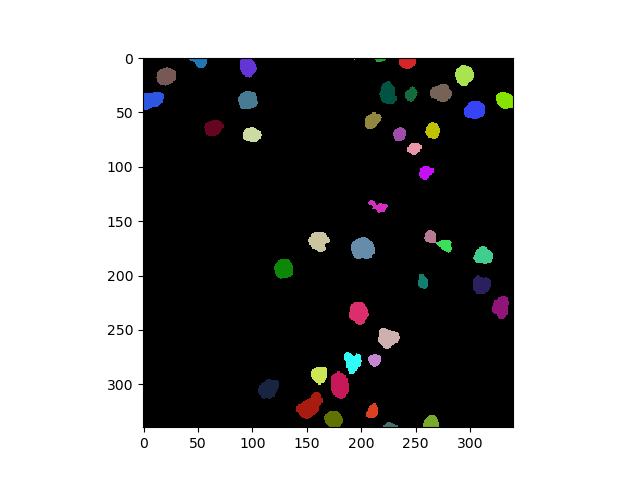

In [6]:
labels = my_segmentation_algorithm(image)

labels

## Quality estimation: Sparse Jaccard Index
From the two label images loaded and produced above we can compute the sparse Jaccard Index.

In [7]:
metrics.jaccard_index_sparse(annotation, labels)

0.8357392602053431

## Exercise
Use the following for-loop and code snippets from above to compute the segmentation quality of all images in the folder. Provide the average quality over all images.

In [8]:
for image_filename in os.listdir(image_folder):
    print(image_folder + image_filename)

data/BBBC007_batch/images/17P1_POS0013_D_1UL.tif
data/BBBC007_batch/images/20P1_POS0005_D_1UL.tif
data/BBBC007_batch/images/20P1_POS0007_D_1UL.tif
data/BBBC007_batch/images/20P1_POS0010_D_1UL.tif
data/BBBC007_batch/images/A9 p7d.tif
data/BBBC007_batch/images/AS_09125_040701150004_A02f00d0.tif
